In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/dft-road-casualty-statistics-vehicle-last-5-years.csv", encoding="utf-8", on_bad_lines='skip')


<ipython-input-47-f6d2eddeaafd>:5: DtypeWarning: Columns (0,2,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/dft-road-casualty-statistics-vehicle-last-5-years.csv", encoding="utf-8", on_bad_lines='skip')


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
df.replace([-1, 99], pd.NA, inplace=True)

In [ ]:
df['accident_year'] = pd.to_numeric(df['accident_year'], errors='coerce')

In [ ]:
df['age_of_driver'] = pd.to_numeric(df['age_of_driver'], errors='coerce')

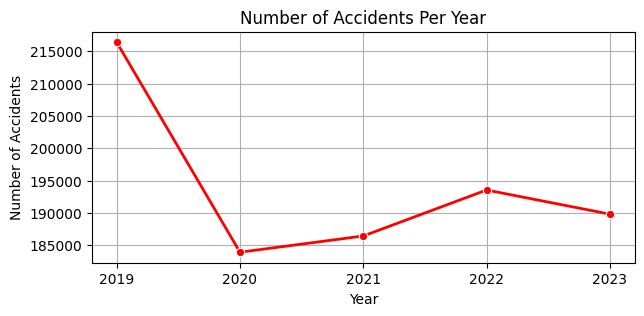

In [ ]:
plt.figure(figsize=(7, 3))
accident_counts = df['accident_year'].value_counts().sort_index()
sns.lineplot(x=accident_counts.index, y=accident_counts.values, marker='o', color='red', linewidth=2)
plt.title("Number of Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.xticks(accident_counts.index)
plt.show()


<ipython-input-53-c873736940e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vehicle_type', data=df, order=df['vehicle_type'].value_counts().index, palette="coolwarm")


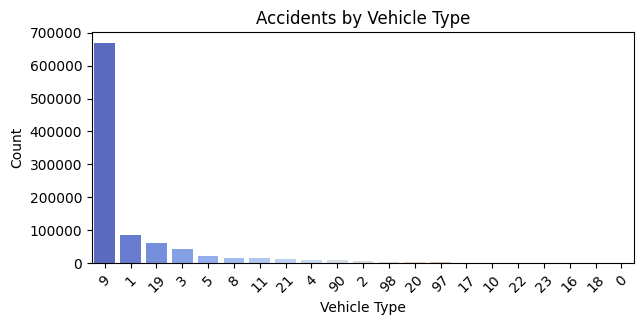

In [ ]:
plt.figure(figsize=(7, 3))
sns.countplot(x='vehicle_type', data=df, order=df['vehicle_type'].value_counts().index, palette="coolwarm")
plt.title("Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

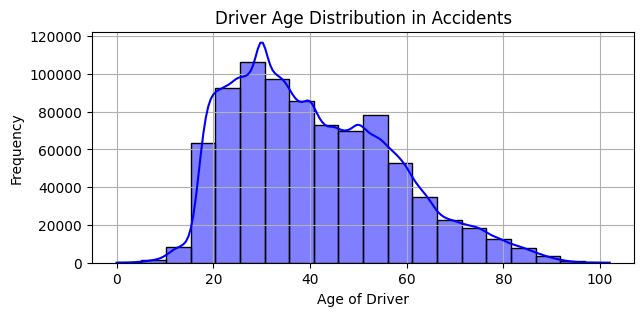

In [ ]:
plt.figure(figsize=(7, 3))
sns.histplot(df['age_of_driver'].dropna(), bins=20, kde=True, color="blue")
plt.title("Driver Age Distribution in Accidents")
plt.xlabel("Age of Driver")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

<ipython-input-55-f6c8f2e4d89a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='first_point_of_impact', data=df, order=df['first_point_of_impact'].value_counts().index, palette="viridis")


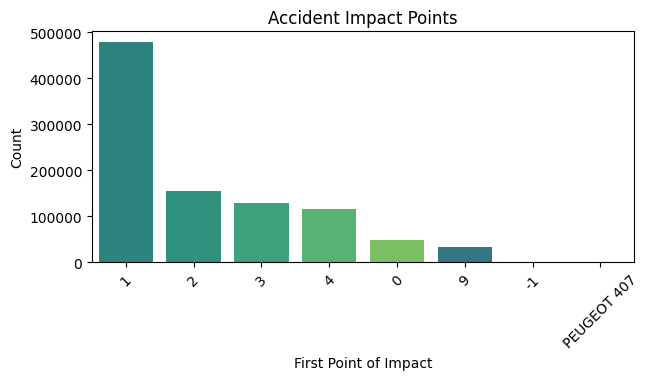

In [ ]:
plt.figure(figsize=(7, 3))
sns.countplot(x='first_point_of_impact', data=df, order=df['first_point_of_impact'].value_counts().index, palette="viridis")
plt.title("Accident Impact Points")
plt.xlabel("First Point of Impact")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-56-444513356caa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='first_point_of_impact', data=df,


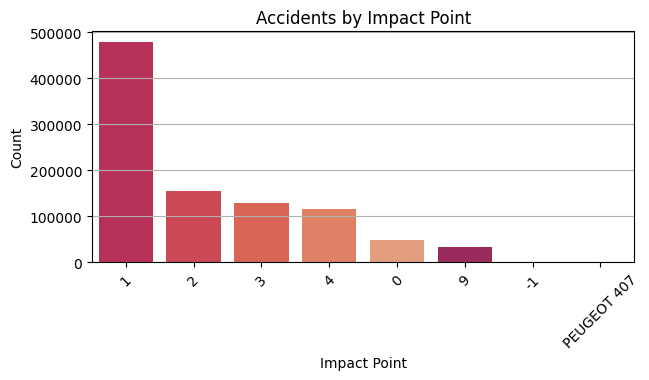

In [ ]:
plt.figure(figsize=(7, 3))
sns.countplot(x='first_point_of_impact', data=df,
              order=df['first_point_of_impact'].value_counts().index,
              palette="rocket")
plt.title("Accidents by Impact Point")
plt.xlabel("Impact Point")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<ipython-input-57-85731f4a088a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='skidding_and_overturning', data=df,


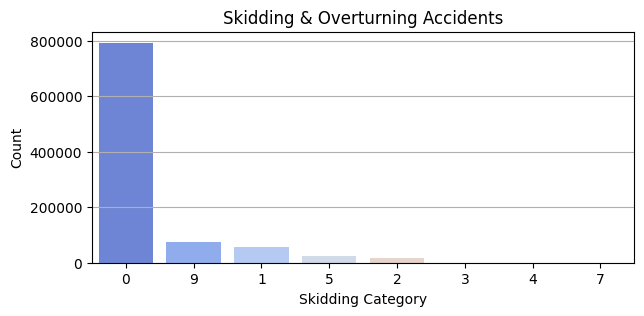

In [ ]:
plt.figure(figsize=(7, 3))
sns.countplot(x='skidding_and_overturning', data=df,
              order=df['skidding_and_overturning'].value_counts().index,
              palette="coolwarm")
plt.title("Skidding & Overturning Accidents")
plt.xlabel("Skidding Category")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


In [ ]:
unused_columns = [
    'accident_reference',
    'location_easting_osgr',
    'location_northing_osgr',
    'local_authority_ons_district',
    'local_authority_highway',
    'vehicle_reference',
    'towing_and_articulation',
    'dir_from_e', 'dir_from_n', 'dir_to_e', 'dir_to_n',
    'lsoa_of_driver',
    'escooter_flag',
    'generic_make_model',
    'propulsion_code',
    'driver_home_area_type',
]

df.drop(columns=unused_columns, inplace=True, errors='ignore')

In [ ]:
df.to_csv("cleaned_accident_data.csv", index=False)